
# **`Use-case: Prévision du médicament le mieux appoprié`**



*   Méthodologie à suivre: CRISP-DM
*   Jeu de données
------
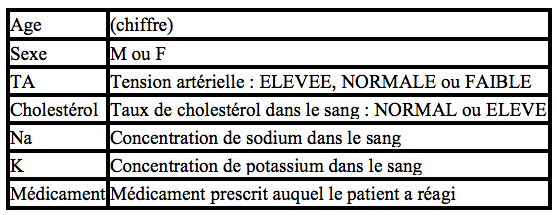

# **`0. Préliminaires: Résumé des étapes de la méthodologies CRISP-DM `**

La méthode CRISP (initialement connue comme CRISP-DM) a été au départ développée par IBM dans les années 60 pour réaliser les projets Datamining. Elle reste aujourd’hui la seule méthode utilisable efficacement pour tous les projets Data Science. Elle se décompose en 6 étapes allant de la compréhension du problème métier au déploiement et la mise en production.

Elle est composée des étapes suivantes:


1.   Compréhension du problème (compréhension métier)

La phase de compréhension du métier consiste à établir clairement le cahier des charges du projet de data mining. Cette phase est réalisée par le maître d’œuvre à partir de la demande du maître d’ouvrage, demande éventuellement exprimée dans un cahier des charges. Elle est l’équivalent de la phase de spécifications fonctionnelles d’un projet de développement informatique. Elle consiste à :

> Énoncer clairement les objectifs globaux du projet et les contraintes de l’entreprise.

> Traduire ces objectifs et ces contraintes en un problème de data mining.
Il s’agit donc de formuler une recherche de corrélations, c’est-à-dire la recherche de règles du type : si A alors B. La phase de compréhension métier amènera probablement le maître d’œuvre à communiquer avec les experts du métier (le maître d’ouvrage).

2.   Compréhension des données

Les phases de compréhension et de préparation sont deux phases très importantes d’un projet de data mining. Elles se font en aller-retour. Pour préparer, il faut comprendre, pour comprendre il faut avoir préparé. Ces deux phases vont occuper plus de la moitié du temps d’un projet de data mining.
Le principe de la compréhension des données est qu’il faut comprendre toutes les modalités (valeur) des variables (champ ou attribut) sur lesquelles vous travaillez, ce qui passe par l’analyse de la répartition des valeurs de chaque variable, le repérage des valeurs anormales et des valeurs manquantes et l’analyse des corrélations les plus évidentes.

Les étapes de la compréhension des données sont:
>  Etablissement du dictionnaire des variables.
>  Nettoyage des données : valeurs manquantes et aberrantes
>  Etudier les corrélations de base entre variables numériques
>  Etudier les corrélations entre variables catégorielles.
>  Etudier les corrélations entre variables numériques et variables catégorielles
>  Si nécessaire faire une discrétisation, créer des variables calculées ou des sous-ensembles

3.   Préparation des données

Les phases de compréhension et de préparation sont deux phases très importantes d’un projet de data mining. Elles se font en aller-retour. Pour préparer, il faut comprendre, pour comprendre il faut avoir préparé. Ces deux phases vont occuper plus de la moitié du temps d’un projet de data mining. Fondamentalement, la préparation précède l’analyse exploratoire et les premières recherches de corrélation. La préparation des données consiste à préparer, à partir des données brutes, l’ensemble final des données qui va être utilisé pour toutes les phases suivantes. Cet objectif comporte plusieurs étapes :

> Fusionner si nécessaire plusieurs tables de données en une seule.
> Réaliser si nécessaire la suppression de certaines données.
> Réaliser si nécessaire la correction de certaines données.
> Réaliser si nécessaire la transformation du type des données
> Mettre de côté si nécessaire les variables inutiles
> Créer si nécessaire des variables calculées

4.   Modélisation statistique

La modélisation est généralement effectuée en utilisant plusieurs itérations. Généralement, les data miners exécutent plusieurs modèles en utilisant les paramètres par défaut, puis affinent ces derniers ou reviennent à la phase de préparation des données pour effectuer les manipulations requises par le modèle de leur choix. Il est rare qu’une question d’exploration de données soit résolue de façon satisfaisante avec un seul modèle et une seule exécution. C’est pourquoi l’exploration de données est si intéressant

5.   Evaluation du modèle

A ce stade, la plus grande partie du projet d’exploration de données est réalisée. Vous avez également déterminé, lors de l’étape de modélisation, que les modèles créés sont techniquement corrects et efficaces en fonction des critères de réussite de l’exploration de données définis précédemment.

6.   Déploiement (utilisation du modèle)

Le déploiement est le processus consistant à l'utilisation des modèles de prédiction obtenus à l'étape précédent.



# **`I. Compréhension du problème`**
Pour cette étude de cas, imaginez que vous êtes maitre d'oeuvre pour une société pharmaceutique et que vous souhaitez compiler des données pour une étude médicale. Vous avez rassemblé des données sur un ensemble de patients, tous souffrant de la même maladie. Lors du traitement, chaque patient a réagi à l'un des cinq médicaments. Votre travail consiste à utiliser le Datamining pour savoir quel médicament pourrait convenir à un futur patient atteint de la même maladie.

Le problème à traiter peut être formalisé comme suit:
Drug=f(Age, Sex, BP, Na, K)

Il s'agit plus précisement d'expliquer la variable Drug (dite variable à expliquer ou variable cible) en fonction des variables Age, Sex, BP, Na et K (dites variables explicatives).

------

# **`II. Compréhension des données`**

---



## **`1. Importation des bibliothèques utiles et paramètrages`**
------

In [ ]:
import time
import warnings
import numpy as np
import pandas as pd
#import cleaner as cl
#import plotly.express as px
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot as plt

In [ ]:
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [ ]:
#Setup du nombre de lignes et colonnes maximum
pd.set_option('display.max_row',100)
pd.set_option('display.max_columns',34)

#Filtre des avertissements
warnings.filterwarnings('ignore')

#Style et taille de nos figures
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

#Fixer le générateur
np.random.seed(42)

## **`2. Chargement de la base de données`**
------

In [ ]:
#Chargement de la base de données
from google.colab import files
uploaded=files.upload()

Saving Drug.csv to Drug.csv


## **`3. Affichage du jeu de données`**
------

In [ ]:
data = pd.read_csv("Drug.csv")
data

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23.0,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47.0,M,LOW,HIGH,0.739309,0.056468,drugC
2,47.0,M,LOW,HIGH,0.697269,0.068944,drugC
3,28.0,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61.0,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,0.848774,0.073380,drugC
196,16.0,M,LOW,HIGH,0.743021,0.061886,drugC
197,52.0,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23.0,M,NORMAL,NORMAL,0.784520,0.055959,drugX


In [ ]:
#Apperçu de la base de données
data.head(10)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23.0,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47.0,M,LOW,HIGH,0.739309,0.056468,drugC
2,47.0,M,LOW,HIGH,0.697269,0.068944,drugC
3,28.0,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61.0,F,LOW,HIGH,0.559294,0.030998,drugY
5,22.0,F,NORMAL,HIGH,0.676901,0.078647,drugX
6,49.0,F,NORMAL,HIGH,0.789637,0.048518,drugY
7,41.0,M,LOW,HIGH,0.766635,0.069461,drugC
8,60.0,M,NORMAL,HIGH,0.777205,0.051230,drugY
9,43.0,M,LOW,NORMAL,0.526102,0.027164,drugY


## **`4. Caractéristiques du jeu de données: dimensions, types des variables`**
------

In [ ]:
#affichage des dimensions
data.shape

(200, 7)

In [ ]:
data.dtypes.value_counts()

object     4
float64    3
dtype: int64

In [ ]:
#sélection des variables qualitatives
variables_qualitatives=[i for i in data.select_dtypes(include = 'object')]
variables_qualitatives

['Sex', 'BP', 'Cholesterol', 'Drug']

In [ ]:
#séléection des variables quantitatives
variables_quantitatives=[i for i in data.select_dtypes(exclude = 'object')]
variables_quantitatives

['Age', 'Na', 'K']

Le jeu de données à analyser comporte **200 observations** et **7 variables** dont


*   dont 4 variables qualitatives (catégorielles): Sex, BP, Cholesterol, Drug
*   et 3 variables quantitatives (numériques): Age, Na, K



# **`5. Analyse exploratoire des données`**

------

> ### **5.1. Analyse univariée**

L’analyse univariée consiste à faire une investigation statistique des données pour se familiariser avec elles. On s’intéresse particulièrement à la répartition des valeurs et leurs ordres de grandeur.

In [ ]:
#Nombre de modalités de la target
data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
#Audit des variables qualitatives

In [ ]:
data[variables_qualitatives].describe().T

,count,unique,top,freq
Sex,199,2,M,103
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,drugY,91


In [ ]:
#Audit des variables quantitatives
data[variables_quantitatives].describe().T #data.select_dtypes(include='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,199.0,44.321608,16.585776,15.000000,31.000000,45.000000,58.000000,74.000000
Na,200.0,0.697095,0.118907,0.500169,0.583887,0.721853,0.801494,0.896056
K,200.0,0.050174,0.017611,0.020022,0.035054,0.049663,0.066000,0.079788


In [ ]:
#Distribution des modalités de la variable à expliquer (variable cible aussi appelée label ou target)
data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
#Distribution en % des modalités de la variable à expliquer (variable cible aussi appelée label ou target)
data['Drug'].value_counts(normalize = True)*100

drugY    45.5
drugX    27.0
drugA    11.5
drugC     8.0
drugB     8.0
Name: Drug, dtype: float64

In [ ]:
#Nombre de valeurs uniques (valeurs distinctes) que chaque variable
for i in data.columns.tolist():
    print(i,":",data[i].nunique())

Age : 57
Sex : 2
BP : 3
Cholesterol : 2
Na : 200
K : 200
Drug : 5


>> ### **5.1.1. Distribution des variables quantitatives**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


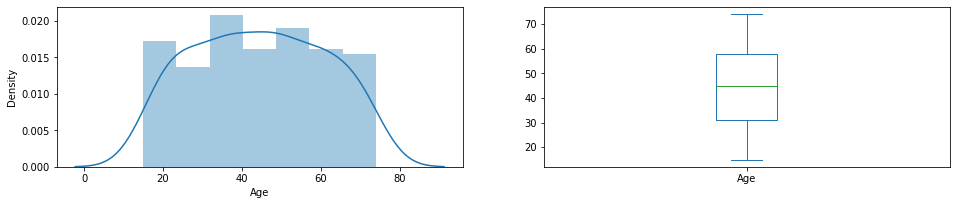

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


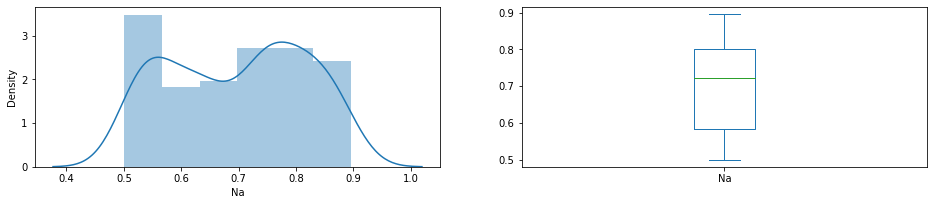

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


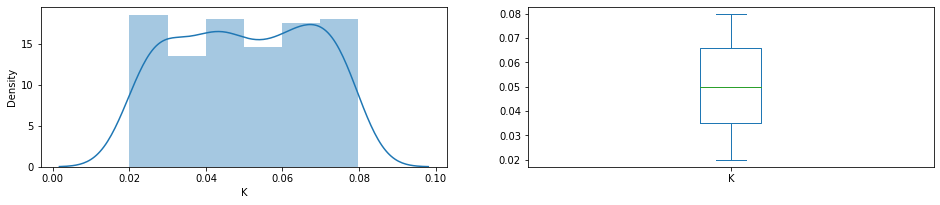

In [ ]:
#Distribution de la variable Na

from matplotlib import pyplot as plt
import seaborn as sns

#Age
plt.subplot(321)
sns.distplot(data['Age'])

plt.subplot(322)
data['Age'].plot.box(figsize=(16,10))
plt.suptitle('')
plt.show()
#Na
plt.subplot(323)
sns.distplot(data['Na'])

plt.subplot(324)
data['Na'].plot.box(figsize=(16,10))
plt.suptitle('')
plt.show()
#K
plt.subplot(325)
sns.distplot(data['K'])

plt.subplot(326)
data['K'].plot.box(figsize=(16,10))
plt.suptitle('')
plt.show()


Les histogrammes dans la première verticale montrent que les variables âge, Na et K ont une distribution symétrique. A titre d'exemple, voici les cas possibles de distribution.

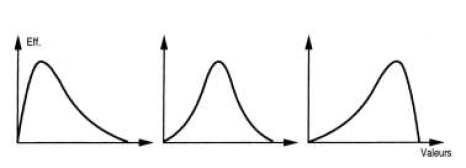

**En ce qui concerne la variable âge, puisque sa distribution est symétrique l'imputation de ses valeurs manquantes se fera en utilisant la moyenne (si sa distribution était asymétrique la médiane serait utilisée).**

In [ ]:
#Imputation de la variable Age par la moyenne
data['Age']=data['Age'].fillna(data['Age'].mean())

Les diagrammes à moustaches dans la deuxième verticale montrent que les variables âge, Na et K ne comportent pas de valeurs aberrantes.

>> ### **5.1.1. Distribution des variables qualitatives**

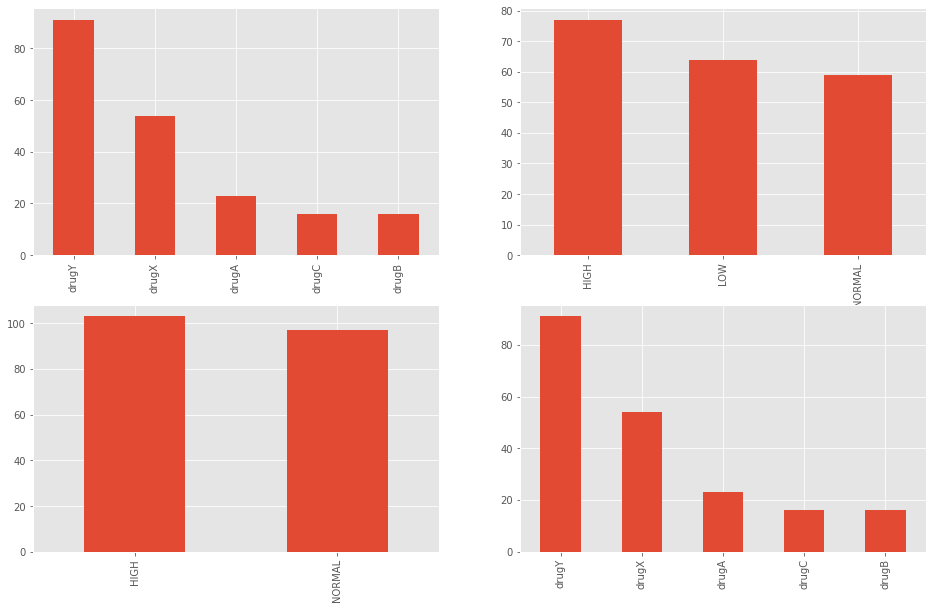

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
plt.subplot(221)
data['Drug'].value_counts().plot.bar()

plt.subplot(222)
data['BP'].value_counts().plot.bar()

plt.subplot(223)
data['Cholesterol'].value_counts().plot.bar()

plt.subplot(224)
data['Drug'].value_counts().plot.bar()



In [ ]:
#Imputation de la variable sexe par le mode
data['Sex']=data['Sex'].fillna(data['Sex'].mode().tolist()[0])

> ### **5.2. Analyse bivariée**

Dans cette partie, nous analysons les corrélations entre la variable cible Drug et les autres variables explicatives, les corrélations entre variables numériques, et enfin les corrélations entre variables catégorielles. En d’autres termes, nous aimerions savoir entre autres si:


*   le médicament à prescrire dépend de l'âge
*   le médicament à prescrire dépend du sexe
*   quelles sont variables numériques corrélées
*   quelles sont variables catégorielles corrélées




>> ### **5.2.1 Visualisation de la pertinence des variables Sex et Age pour expliquer le médicament**

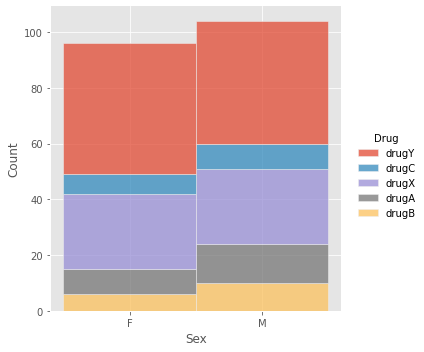

In [ ]:
sns.displot(data=data, x="Sex", hue="Drug", multiple="stack")

A la lecture de ce graphique, nous constatons que le médicament préscrit ne dépend pas du sexe. En effet, les cinq médicaments (drug Y, drug X,drug A, drug B et drug C) ont tous été donné aux patients de sexe féminin et masculin

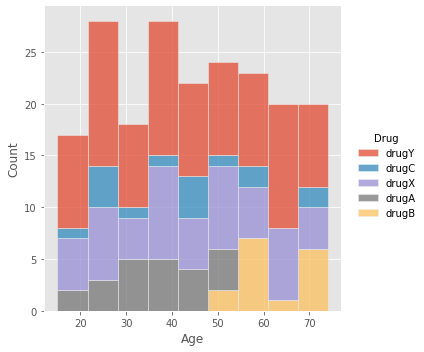

In [ ]:
sns.displot(data=data, x="Age", hue="Drug", multiple="stack")

>> ### **5.2.2. Test de corrélations entre variables numériques**

L'analyse du médicament en fonction de l'âge nous apprend que le médicament drugB est donné seulement au patient âgés d'au moins 50 ans et que le médicament B est seulement donnné au patient âgés d'au plus 50 ans. Ce qui nous amène à conclure que le médicament dépend de l'âge. Donc l'âge est une variable discriminante pour le médicament (Drug)

- Un test statistique est une procédure de décision entre deux hypothèses. Il s’agit d’une démarche consistant à rejeter ou à ne pas rejeter une hypothèse statistique, appelée hypothèse nulle $H_{0}$, en fonction d’un jeu de données.

- Il existe un test pour déterminer si deux variables continues (quantitatives) sont indépendantes : **le test de corrélation de Pearson**. L’hypothèse nulle à tester est : **« les deux variables testées sont indépendantes »**.

- Il s’accompagne d’une statistique de test et d’une p-valeur qui détermine du rejet ou non de l’hypothèse nulle.

- Si la **p-value** est inférieur à **5%** alors on rejette l'hypothèse nulle $H_{0}$, sinon on l'accepte.

In [ ]:
#Définition d'une fonction de test entre variables quantitatives
def test_pearson(df, var1, var2):
    print("{} et {}".format(var1,var2))
    print("Coefficient de Pearson : {}".format(pearsonr(df[var1],df[var2])[0]))
    print("               P_value : {}".format(pearsonr(df[var1],df[var2])[1]))
    if (pearsonr(df[var1],df[var2])[1] < 0.05):
        print("{} et {} ne sont pas indépendantes".format(var1,var2))
    else:
        print("{} et {} sont indépendantes".format(var1,var2))
    print("\n \n")
    pass

In [ ]:
#test d'indépendence entre toutes les variables numériques
#Test Statistique de Pearson
from scipy.stats import pearsonr
for var1 in variables_quantitatives:
    liste=[var1]
    #liste.append(var1)
    for var2 in [var for var in variables_quantitatives if var not in liste ]:
        test_pearson(data,var1,var2)

Age et Na
Coefficient de Pearson : 0.10013454102152941
               P_value : 0.15830704033580334
Age et Na sont indépendantes

 

Age et K
Coefficient de Pearson : 0.11127812080719125
               P_value : 0.11671268905044879
Age et K sont indépendantes

 

Na et Age
Coefficient de Pearson : 0.10013454102152941
               P_value : 0.15830704033580334
Na et Age sont indépendantes

 

Na et K
Coefficient de Pearson : 0.017334587466501242
               P_value : 0.8075175505627852
Na et K sont indépendantes

 

K et Age
Coefficient de Pearson : 0.11127812080719125
               P_value : 0.11671268905044879
K et Age sont indépendantes

 

K et Na
Coefficient de Pearson : 0.017334587466501242
               P_value : 0.8075175505627852
K et Na sont indépendantes

 



>>> ### **5.2.3. Test de corrélations entre variables qualitatives**


Pour savoir si deux variables catégorielles sont liées, on utilise le célèbre test du khi-deux. Dans ce dernier, l’hypothèse nulle est simplement **« les deux variables testées sont indépendantes »**. Si la p-value de test obtenue est en-dessous de **5%** alors **on rejette l’hypothèse nulle**.

En Python le test est facilement implémentable à l’aide de la bibliothèque **scipy** et de sa fonction **chi2_contingency**. Elle permet d’obtenir rapidement la **p-valeur** du test ainsi que la **statistique** et le **degré de liberté** associé. Dans la pratique le test du khi-deux demande, en amont, un petit travail sur les données. Pour pouvoir effectuer le test il faut d’abord déterminer la **table de contingence**. C’est un tableau de croisement entre les modalités des deux variables. Il s’obtient facilement avec la fonction crosstab de Pandas.

In [ ]:
#Définition d'une fonction de test entre variables qualitatives
def test_khi2(df, var1, var2):
    table = pd.crosstab(df[var1],df[var2])
    resultats = chi2_contingency(table)
    print("{} et {}".format(var1,var2))
    print("Statistique de test : {}".format(resultats[0]))
    print("   Degré de liberté : {}".format(resultats[2]))
    print("            P_value : {}".format(resultats[1]))
    if ( resultats[1] < 0.05):
        print("{} et {} ne sont pas indépendantes".format(var1,var2))
    else:
        print("{} et {} sont indépendantes".format(var1,var2))
    print("\n \n")
    pass

In [ ]:
#Test Statistique du Khi-deux
qual_cols=['Sex', 'BP', 'Cholesterol']
from scipy.stats import chi2_contingency
liste = []
for var1 in qual_cols:
    liste.append(var1)
    for var2 in [var for var in qual_cols if var not in liste ]:
        test_khi2(data,var1,var2)

Sex et BP
Statistique de test : 0.7110738837433747
   Degré de liberté : 2
            P_value : 0.7007970548859668
Sex et BP sont indépendantes

 

Sex et Cholesterol
Statistique de test : 0.0
   Degré de liberté : 1
            P_value : 1.0
Sex et Cholesterol sont indépendantes

 

BP et Cholesterol
Statistique de test : 4.33632565148387
   Degré de liberté : 2
            P_value : 0.11438757389420079
BP et Cholesterol sont indépendantes

 



>> ### **5.2.4. Test de corrélations entre variables qualitatives et variables quantitatives**

Toujours dans l'optique d'éviter les effets de rédondances, nous allons étudier en dernier les relations entre variables indépendantes qualitatives et quantitatives. L'ANOVA est alors nécessaire pour une telle étude.

In [ ]:
#Définition d'une fonction de test entre variables qualitative et quantitative
def test_anova(df, var1, var2):
    results = statsmodels.formula.api.ols('{} ~ {}'.format(var1,var2), data = df).fit()
    table = statsmodels.api.stats.anova_lm(results)
    print("{} et {}".format(var1,var2))
    print("Statistique de test : {}".format(table['F'][0]))
    print("   Degré de liberté : {}".format(table['df'][0]))
    print("            P_value : {}".format(table['PR(>F)'][0]))
    if ( table['PR(>F)'][0] < 0.05):
        print("{} et {} ne sont pas indépendantes".format(var1,var2))
    print("\n \n")
    pass

In [ ]:
#ANOVA
variables=['Sex', 'BP', 'Cholesterol','Na','K','Age']
from scipy.stats import chi2_contingency
liste = []
for var1 in qual_cols:
    liste.append(var1)
    for var2 in [var for var in variables if var not in liste ]:
        test_khi2(data,var1,var2)

Sex et BP
Statistique de test : 0.7110738837433747
   Degré de liberté : 2
            P_value : 0.7007970548859668
Sex et BP sont indépendantes

 

Sex et Cholesterol
Statistique de test : 0.0
   Degré de liberté : 1
            P_value : 1.0
Sex et Cholesterol sont indépendantes

 

Sex et Na
Statistique de test : 200.0
   Degré de liberté : 199
            P_value : 0.4667457435013782
Sex et Na sont indépendantes

 

Sex et K
Statistique de test : 200.0
   Degré de liberté : 199
            P_value : 0.4667457435013782
Sex et K sont indépendantes

 

Sex et Age
Statistique de test : 53.894803113553124
   Degré de liberté : 57
            P_value : 0.5923156757509966
Sex et Age sont indépendantes

 

BP et Cholesterol
Statistique de test : 4.33632565148387
   Degré de liberté : 2
            P_value : 0.11438757389420079
BP et Cholesterol sont indépendantes

 

BP et Na
Statistique de test : 400.0
   Degré de liberté : 398
            P_value : 0.46239885430684285
BP et Na sont indép

> ### **5.3. Analyse multivariée**

Dans cette partie, nous analysons les corrélations entre la variable cible Drug et les variables explicatives Na et K. En d’autres termes, nous aimerions savoir entre autres si:

*   le médicament à préscrire dépend de Na ou K

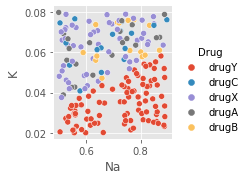

In [ ]:
# Analyse du médicament suivant Na et K
''' Est-ce que le médicament à préscrire dépend du taux de sodium ou potatium ?
En d'autres termes, est-ce que Na et K impactent sur le médicament à prescrire '''
sns.pairplot(data,x_vars='Na',y_vars='K',hue='Drug')

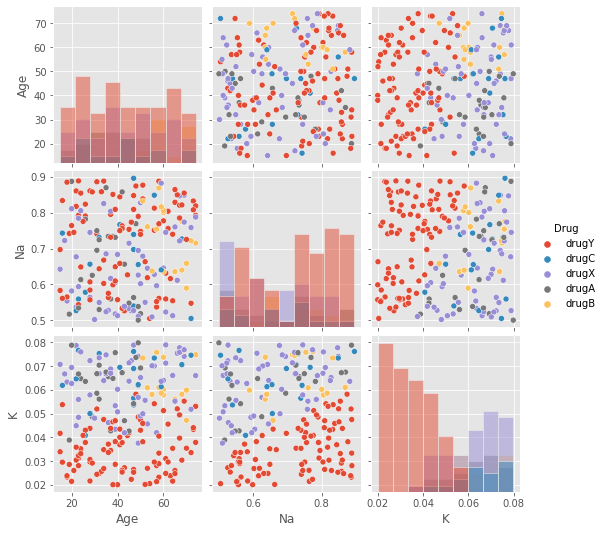

In [ ]:
#Vue globale (nuage de points et histogrammes)
#variable_num = ['Age', 'Na','K']
sns.pairplot(data, hue='Drug', diag_kind='hist')

Le nuage de points ci-dessus, nous montre que les points rouges sont séparés clairement des autres, ce qui illustre que le médicament Y est donné si le ratio Na/K ou K/Na est supérieur ou inférieur à un seuil. Par conséquent, la variable Na/k doit être crées car elle explique mieux la variable Drug que les variables Na et K prises séparemment.

# **`III. Préparation des données`**

---



> ### **1. Création d'une nouvelle variable calculée**

In [ ]:
#Création d'un champ calculé Na_sur_K
data['Na_sur_K']=data['Na']/data['K']
data

,Age,Sex,BP,Cholesterol,Na,K,Drug,Na_sur_K
0,23.0,F,HIGH,HIGH,0.792535,0.031258,drugY,25.354629
1,47.0,M,LOW,HIGH,0.739309,0.056468,drugC,13.092530
2,47.0,M,LOW,HIGH,0.697269,0.068944,drugC,10.113556
3,28.0,F,NORMAL,HIGH,0.563682,0.072289,drugX,7.797618
4,61.0,F,LOW,HIGH,0.559294,0.030998,drugY,18.042906
...,...,...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,0.848774,0.073380,drugC,11.566830
196,16.0,M,LOW,HIGH,0.743021,0.061886,drugC,12.006286
197,52.0,M,NORMAL,HIGH,0.549945,0.055581,drugX,9.894478
198,23.0,M,NORMAL,NORMAL,0.784520,0.055959,drugX,14.019550


Comme annoncé plus haut, les phases de compréhension des données et de préparation de données se font en aller-retour. Bien que nous soyons dans la phae de préparation des données, nous sommes amenés à revenir sur l'étape compréhension des données en testant les corrélations entre la nouvelle variable Na_sur_K et les variables Na et K

In [ ]:
#test d'indépendence entre les variables Na et Na_sur_K
from scipy.stats import pearsonr
test_pearson(data, 'Na', 'Na_sur_K')

Na et Na_sur_K
Coefficient de Pearson : 0.35073033169239515
               P_value : 3.549448324091791e-07
Na et Na_sur_K ne sont pas indépendantes

 



In [ ]:
#test d'indépendence entre les variables K et Na_sur_K
from scipy.stats import pearsonr
test_pearson(data, 'K', 'Na_sur_K')

K et Na_sur_K
Coefficient de Pearson : -0.8683725306633279
               P_value : 3.190348978295469e-62
K et Na_sur_K ne sont pas indépendantes

 



Puisque les variables Na et K sont liées à la variable Na_sur_K, nous allons seulement retenir Na_sur_K (et non plus Na et K) comme potentiel descipteur de la variable cible.

In [ ]:
#liste des déscripteurs (variables explicatives) retenus
descripteursEtCible=['Age','Sex','BP','Cholesterol','Na_sur_K','Drug']
df=data[descripteursEtCible]
df

,Age,Sex,BP,Cholesterol,Na_sur_K,Drug
0,23.0,F,HIGH,HIGH,25.354629,drugY
1,47.0,M,LOW,HIGH,13.092530,drugC
2,47.0,M,LOW,HIGH,10.113556,drugC
3,28.0,F,NORMAL,HIGH,7.797618,drugX
4,61.0,F,LOW,HIGH,18.042906,drugY
...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,11.566830,drugC
196,16.0,M,LOW,HIGH,12.006286,drugC
197,52.0,M,NORMAL,HIGH,9.894478,drugX
198,23.0,M,NORMAL,NORMAL,14.019550,drugX


# Encodage des données numériques

>>>  **Rappel:**
Les variables qualitatives ne sont pas encodées. Comme certains des algorithmes de Machine Learning ne peuvent pas apprendre avec des données qualitatives, nous penserons à les encoder comme suit :   

*   Un **encodage oneHot** pour les variables catégorielles booléennes (e.g. Sex qui a comme modalités 'M' et 'F'
*   Un **encodage ordinal** pour les variables catégorielles ordinales (e.g. qui a comme modalité BP qui a comme modalités 'Hight','Low' et 'Normal'
    

In [ ]:
#Cette fonction permet de remplacer les modalités d'une variable par leur valeur numérique correspondante définie dans la fonction replace.
#Exemple :
#   Yes : 1
#    No : 0
def manual_encoder(element):
    element = element.replace(['M', 'F'] , [1,0])
    element = element.replace(['HIGH', 'NORMAL', 'LOW'] , [3,2,1])
    element = element.replace(['drugY', 'drugX', 'drugA', 'drugB','drugC'] , [0,2,1,3,4])
    return element

In [ ]:
#Définition d'une fonction d'encodage
def encoding(df):
    df_new = df.copy()
    for var in ['Drug', 'Sex', 'BP', 'Cholesterol'] :
        df_new[var] = manual_encoder(df_new[var])
    #la fonction pd.get_dummies() permet de faire un encodage OneHot
    #df_new = pd.get_dummies(df_new)
    return df_new

In [ ]:
#Appel de la fonction encoding
df_encoded = encoding(df)
df_encoded

,Age,Sex,BP,Cholesterol,Na_sur_K,Drug
0,23.0,0,3,3,25.354629,0
1,47.0,1,1,3,13.092530,4
2,47.0,1,1,3,10.113556,4
3,28.0,0,2,3,7.797618,2
4,61.0,0,1,3,18.042906,0
...,...,...,...,...,...,...
195,56.0,0,1,3,11.566830,4
196,16.0,1,1,3,12.006286,4
197,52.0,1,2,3,9.894478,2
198,23.0,1,2,2,14.019550,2


# Subdivision de la base en Train / Test

La dernière étape de la préparation des données est subdivision des données en deux ensembles:


*   Données d'apprentissage
*   et données test



In [ ]:
#Affectation de la matrice de variables explicatives à X et de la target à y
X = df_encoded.drop('Drug', axis = 1)
y = df_encoded[['Drug']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
print("Dimensions X_train :", X_train.shape)
print("Dimensions y_train :", y_train.shape)
print("Dimensions X_test :", X_test.shape)
print("Dimensions y_test :", y_test.shape)

Dimensions X_train : (140, 5)
Dimensions y_train : (140, 1)
Dimensions X_test : (60, 5)
Dimensions y_test : (60, 1)


In [ ]:
#Apperçu
X_train.head()

,Age,Sex,BP,Cholesterol,Na_sur_K
165,38.0,1.0,1,3,18.295189
198,23.0,1.0,2,2,14.019550
85,59.0,1.0,3,3,13.935032
18,23.0,1.0,1,3,7.297576
141,64.0,0.0,1,2,25.741186


# **`IV. Modélisation statistique`**
------

Dans cette étape, il s'agit de développer un modèle performant de classification pour prédire le médicament qui va convenir le mieux à un futur patient.
Pour rappel la classification, aussi appelée apprentissage supervisée, est un processus à trois (3) étapes:


1.   Phase d'apprentissage: construction du modèle
2.   Phase test: validation du modèle
3.   Utilisation du modèle



> ## **1. Construction du modèle**

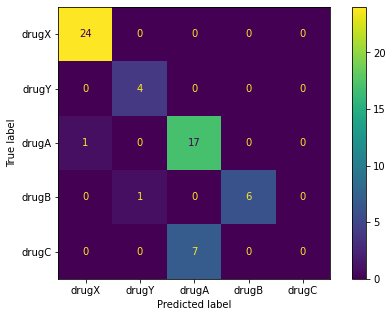

In [ ]:
from pyparsing.helpers import trace_parse_action
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

# Step 1: Importation de l'algorithme d'apprentissage à utiliser
#from sklearn.tree import DecisionTreeClassifier

# Step 2: Instanciation de notre algorithme d'apprentissage
clf = DecisionTreeClassifier(max_depth = 3)

# Step 3: Apprentissage: construction du modèle prédictif
clf.fit(X_train, y_train)

# Step 4: Test de la précision du modèle
y_pred = clf.predict(X_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["drugX", "drugY", "drugA", "drugB", "drugC"]
)

cmp.plot(ax=ax)
plt.show();


In [ ]:
#Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       0.80      1.00      0.89         4
           2       0.71      0.94      0.81        18
           3       1.00      0.86      0.92         7
           4       0.00      0.00      0.00         7

    accuracy                           0.85        60
   macro avg       0.69      0.76      0.72        60
weighted avg       0.77      0.85      0.80        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#F1_score
f1_score(y_test, y_pred, average='micro')*100

85.0

In [ ]:
#Rappel
recall_score(y_test, y_pred, average='micro')*100

85.0

In [ ]:
#Precision
precision_score(y_test,y_pred, average='micro')*100

85.0

In [ ]:
#Autre méthode pour afficher la matrice de confusion

[Text(0.625, 0.875, 'Na_sur_K <= 14.616\ngini = 0.682\nsamples = 100.0%\nvalue = [0.471, 0.1, 0.271, 0.086, 0.071]\nclass = drugY'),
 Text(0.5, 0.625, 'BP <= 2.5\ngini = 0.656\nsamples = 52.9%\nvalue = [0.0, 0.189, 0.514, 0.162, 0.135]\nclass = drugX'),
 Text(0.25, 0.375, 'BP <= 1.5\ngini = 0.33\nsamples = 34.3%\nvalue = [0.0, 0.0, 0.792, 0.0, 0.208]\nclass = drugX'),
 Text(0.125, 0.125, 'gini = 0.486\nsamples = 17.1%\nvalue = [0.0, 0.0, 0.583, 0.0, 0.417]\nclass = drugX'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 17.1%\nvalue = [0.0, 0.0, 1.0, 0.0, 0.0]\nclass = drugX'),
 Text(0.75, 0.375, 'Age <= 50.5\ngini = 0.497\nsamples = 18.6%\nvalue = [0.0, 0.538, 0.0, 0.462, 0.0]\nclass = drugA'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 10.0%\nvalue = [0.0, 1.0, 0.0, 0.0, 0.0]\nclass = drugA'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 8.6%\nvalue = [0.0, 0.0, 0.0, 1.0, 0.0]\nclass = drugB'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 47.1%\nvalue = [1.0, 0.0, 0.0, 0.0, 0.0]\nclass = drug

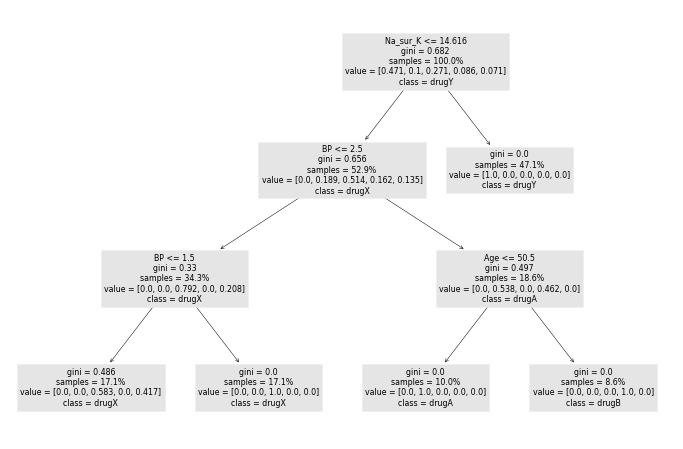

In [ ]:
#affichage de l'arbre
tree.plot_tree(clf,proportion=True,feature_names=["Age", "Sex", "BP", "Cholesterol", "Na_sur_K"],class_names=["drugY", "drugA", "drugX", "drugB", "drugC"])

In [ ]:
#Utilisation du modèle pour une prédiction
#clf.predict(["Age", "Sex", "BP", "Cholesterol", "Na_sur_K"])
print(clf.predict([[52, 1, 2, 1, 13]]))

[2]


# **`V. Déploiement: utilisation du modèle`**
------

Ce notebook est de base conçu pour vous permettre principalement de maitriser la méthologie CRISP-DM.